#### Imports Libraries
***

In [5]:
#-----Standard Import
import numpy as np
import pandas as pd

#-----For Plotting Graphs
import seaborn as sb
import matplotlib.pyplot as plt 
import plotly.express as px

#-----Sklearn modules etc for datas
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

## Checking Variables and Comparing Models
***
 > By comparing the coefficient and the classification report for each matrix we would like to evaluate each models through the following steps:
 > - Step 1: We would train the model with the data set train_resampled_data with the model chosen, tt
 > - Step 2: Plot out the neccessary graphs to visualise the correlation/the outcome of putting trained against test data
 > - Step 3: Evaluate the relationship between variables
 > - Step 4: Evaluate the model's performance
 > - Step 5: Compare the models' performances and relationship between the predictors and response variable
 
 > We have chosen to focus on 4 variables age, bmi, HbA1c , blood_glucose_level as they have the highest correlation while we choose to ignore hypertension and heart disease due to its minute positive data and its close to 0 correelation. We also chose to ignore the smoking history as there no information makes up about 36.8%.

#### Defining the performance metrics:
    
   > - Precision: 
        A measure of the model's ability to correctly predict positive cases out of all instances predicted as positive. It is calculated as the proportion of true positives among the predicted positives (true positive + false positive).
    
   > - Recall:
        A measure of the model's ability to correctly predict positive cases out of all actual positive instances. It is calculated as the proportion of true positives among the actual positives (true positives + false negatives).
    
   > - F1-Score:
        A harmonic mean of precision and recall, which gives a balance between the two metrics. It ranges between 0 and 1, with 1 indicating the best possible performance.
        
   > - Support:
         Represents the number of instances or observations in the test set that belong to each class. It shows the number of true positives + false negative instances for each class.
         
   > - Accuracy: 
         A measure of the overall performance of the model in terms of correctly predicting both positive and negative cases. It is calculated as the proportion of correct predictions (true positives+true negatives) out of all predictions.
     
   >- Macro-average:
         A useful metric when the class distribution is relatively balanced as it calculates the average of prevision, recall and F1-score for each class separately and then takes the average of those averages, giving each class equal importance, regardless of the number of instances in each class.
     
   >- Weighted-average:
         A useful metric when the class distribution is imbalanced as it calculates teh average of precision, recall and F1-swcore for each class separately, but the average is weighted by the number of instances in each class, giving more importance to larger classes.
     
 
     
   

### Fine-Tuning

We chose GridSearchCV to fine-tune our machine learning models and incorportated it into all of them in a similar manner. This tool involved selecting a range of hyperparameters to test and coming up with the best combination of hyperparameters which is not immediately apparent to us. By systematically testing different combinations of hyperparameters, GridSearchCV helps identify the optimal set of hyperparameters that maximizes the performance of the specific model and provide the most accurate information regarding the dataset.

#### Read Datas From CSV
***

In [6]:
train_resampled_data = pd.read_csv('train_resampled_data.csv')
test_data = pd.read_csv('test_data.csv')


In [7]:
predictors = ['HbA1c_level', 'blood_glucose_level', 'age', 'bmi']
# Split the data into training and testing sets
X_train = train_resampled_data[predictors]
y_train = train_resampled_data['diabetes']           

X_test = test_data[predictors]
y_test =  test_data['diabetes']  

# Machine Learning Model 3: Gradient Boosting Classifier

We chose Gradient Boosting Classifier as one of our models as it is able to handle complex relationships, high-dimensional data, imbalanced class distributions and provides interpretable results. We found this model relevant and useful in analysing this dataset.

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best accuracy:  0.9708758671253737


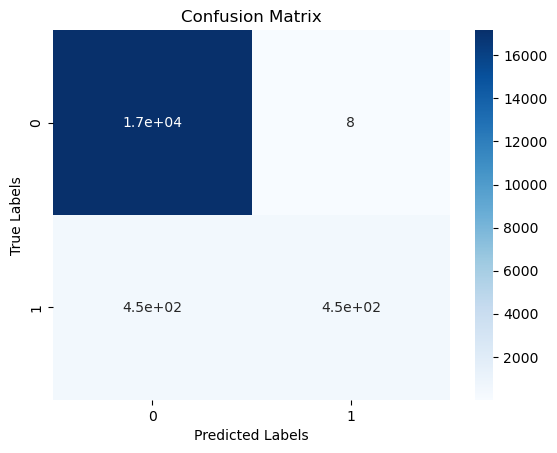

              precision    recall  f1-score   support

    Diabetes       0.98      0.50      0.66       901
 No Diabetes       0.97      1.00      0.99     17177

    accuracy                           0.97     18078
   macro avg       0.98      0.75      0.82     18078
weighted avg       0.97      0.97      0.97     18078

Accuracy: 0.97
Macro-average Precision: 0.978374818558142
Macro-average Recall: 0.74837978307337
Macro-average F1-score: 0.8235162611822568
 
Weighted-average Precision: 0.9747003195262495
Weighted-average Recall: 0.9744993915256113
Weighted-average F1-score: 0.9704812411157798
 
Predictor: HbA1c_level
Precision: 0.9846067555777142
Recall: 0.532787023454229
F1-score: 0.69142988435322
Support: 5930.699999999996
 
Predictor: blood_glucose_level
Precision: 0.9840405804730401
Recall: 0.5457265694457345
F1-score: 0.702089975203684
Support: 150722.0
 
Predictor: age
Precision: 0.9786741494212557
Recall: 0.49569187585496277
F1-score: 0.6580737980400713
Support: 56289.0
 


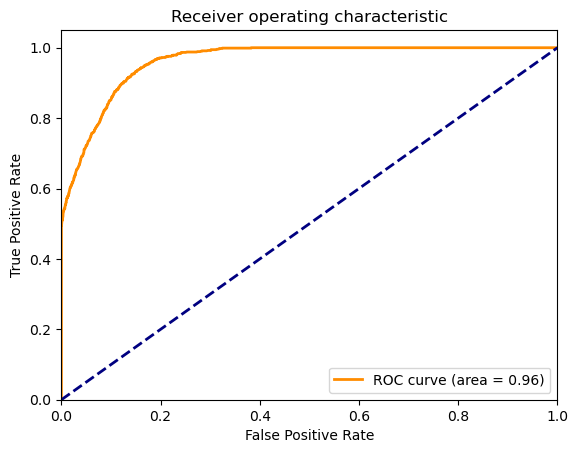

AUC score: 0.9614614488814217


In [8]:

gb_clf = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(gb_clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Train the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)
gb_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sb.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display the classification report
report = classification_report(y_test, y_pred, labels=[1, 0], target_names=['Diabetes', 'No Diabetes'], zero_division=1)
print(report)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Calculate the macro-average precision, recall, and F1-score
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro-average Precision:", macro_precision)
print("Macro-average Recall:", macro_recall)
print("Macro-average F1-score:", macro_f1)

# Calculate the weighted-average precision, recall, and F1-score
weighted_precision = precision_score(y_test, y_pred, average='weighted')
weighted_recall = recall_score(y_test, y_pred, average='weighted')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print (" ")
print("Weighted-average Precision:", weighted_precision)
print("Weighted-average Recall:", weighted_recall)
print("Weighted-average F1-score:", weighted_f1)

# Calculate and print precision, recall, F1-score, and support for each predictor
for predictor in predictors:
    report = classification_report(y_test, y_pred, labels=[1, 0], target_names=['Diabetes', 'No Diabetes'], zero_division=1, 
                                    sample_weight=X_test[predictor], output_dict=True)
    precision = report['Diabetes']['precision']
    recall = report['Diabetes']['recall']
    f1 = report['Diabetes']['f1-score']
    support = report['Diabetes']['support']
    print(" ")
    print("Predictor:", predictor)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Support:", support)
    
# Compute the feature importance scores
importance_scores = pd.DataFrame(gb_clf.feature_importances_, index=predictors, columns=['Importance Score'])

# Display the importance scores
print(importance_scores)

# Rank the features by their importance score
importance_scores['Absolute Score'] = abs(importance_scores['Importance Score'])
importance_scores_ranked = importance_scores.sort_values('Absolute Score', ascending=False)

# Display the ranked features
print(importance_scores_ranked)

# Make predictions on the testing set
y_scores = gb_clf.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC score:", roc_auc)

### Evaluating the relationship between the predictors and response variable

 -  Comparing the importance scores of the predictors, we can see that HbA1c_level is the most important predictor in predicting the outcome of whether or not one may get diabetes with the higest score of 0.698, followed by blood_glucose_level with an importance score of 0.188, age with a score of 0.098 and finally bmi with an importance score of 0.016. The absolute scores provide the same information as the importance scores but with all scores normalized to sum up to 1.0.

### Evaluating performance of Gradient Boosting Classifier model

   - Firstly, the model achieved and overall accuracy of 0.97 indicating that it accurately predicted the outcome for 97% of the samples, a very high percentage in terms of accuracy of the model.

   - For the "Diabetes" class, the model achieved a precision of 0.98 telling us that it correctly predicted 98% cases of this class. Recall was 0.5 and F1-score was 0.66 showing that this model prodcues results that have higher values in terms of the accuracy of predicting the outcome cases. Additionally, the weighted-average precision score is relatively high as well at a value of 0.97. Overall, the model performed well on this dataset, achieving high scores in the difference performance metrics.
    
   - Since we incorportated GridSearchCV for finetuning the model, the model became more robut and interpretable as the accuracy and generalizability increased. The hyperparameters worked with by the tool included the number of trees in the ensemble, the learning rate, the maximum depth of the trees among many others.
    

# Comparing between models
***

- We used ROC graphs to compare the performance of the models. To compare ROC graphs, we use the Area Under the Curve (AUC) metric which is a measure of the overall performance of the model. A higher AUC value indicates better overall performance of a model in terms of distinguishing between two classes. Since model 3 has the highest AUC value of 0.961, we can conclude that the gradient boosting classifier model has the best overall performance among the three models.In addition to the AUC value, comparing the shape of the ROC curves shows how the last cutve is the closest to the top left corner indicating best performance once again as it has the highest true positive rate for a low false positive rate. 

- In conjunction with the other metrics, especially the weighted-average score, we see from the classification reports that model 3 is the best at training the dataset as it has the highest score values for all.

- In conclusion, Gradient Boosting Classifier is the best model to evaluate our dataset and moving forward, we would use this model to evaluate the relationship between the predictors and outcome variable.

# Therefore, from this Model we see that the top predictor is "HbA1c_level", addressing our problem definition.